# Maternal Mortality Indicator
- **Project: Analysis of the dynamics of COVID-19 infection in Colombia**
- **Analysis: Clustering**
- **Data: SIVIGILA - Weekly maternal mortality ratio by Department in Colombia [2017, 2018 & 2020]**
- **Created by: Andrés Segura Tinoco**
- **Created on: June 30, 2020**

In [1]:
# Load Pandas libraries
import warnings
import pandas as pd
import numpy as np
import math
from collections import Counter

In [2]:
# Load scikit-learn library for K-Means
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture

In [3]:
# Import Plot libraries
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib.cbook
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

In [4]:
# Programs hyper-params
init_year = 2018
n_pc = 3
with_geo = "geo"
gaussian = True

In [5]:
# Read raw data
csv_file = 'mm_weekly_dpt_pivot_%s-2019_%s.csv' % (init_year, with_geo)
data_url = '../data/' + csv_file
rawdata = pd.read_csv(data_url, index_col=['Department'])

In [6]:
# Remove DC
remove_dc = False
if remove_dc:
    rawdata = rawdata[rawdata.index != 'BOGOTA']
rawdata

,area,population,pib,last_births,perc_women,1,2,3,4,5,...,43,44,45,46,47,48,49,50,51,52
Department,,,,,,,,,,,,,,,,,,,,,
AMAZONAS,9.60,0.15,0.08,0.21,47.98,0,0,0,0,0,...,0,1,1,0,0,0,0,0,0,0
ANTIOQUIA,5.57,13.40,14.39,11.48,51.68,0,2,0,1,2,...,1,1,0,2,0,2,1,2,0,1
ARAUCA,2.08,0.54,0.52,0.80,49.67,0,0,0,0,0,...,0,0,0,0,1,1,0,0,1,1
ATLANTICO,0.26,5.11,4.40,6.75,51.30,1,1,0,1,0,...,1,2,1,2,0,3,1,2,2,0
BOGOTA,0.16,16.35,25.61,15.95,52.15,1,2,2,3,2,...,4,1,1,2,2,1,1,0,1,0
BOLIVAR,2.27,4.35,3.60,5.27,50.39,3,1,2,0,2,...,0,0,1,1,0,1,1,2,4,0
BOYACA,2.01,2.65,2.71,2.12,50.76,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
CALDAS,0.69,2.05,1.59,1.35,51.58,0,0,0,0,0,...,0,1,1,0,0,0,0,0,0,0
CAQUETA,7.79,0.99,0.41,1.08,49.40,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


#### Result
Data for:
- 31 Departments
- 1 DC

In [7]:
# Read departments data
dataURL = '../data/col_dpt_list.csv'
dpt_data = pd.read_csv(dataURL)

# Save zone by departments
dpt_zone = {}
for ix, row in dpt_data.iterrows():
    dpt = row['department']
    zone = row['zone']
    dpt_zone[dpt] = zone

dpt_zone

{'AMAZONAS': 'AMAZONIA',
 'CAQUETA': 'AMAZONIA',
 'GUAINIA': 'AMAZONIA',
 'GUAVIARE': 'AMAZONIA',
 'PUTUMAYO': 'AMAZONIA',
 'VAUPES': 'AMAZONIA',
 'ANTIOQUIA': 'ANDINA',
 'BOGOTA': 'ANDINA',
 'BOYACA': 'ANDINA',
 'CALDAS': 'ANDINA',
 'CUNDINAMARCA': 'ANDINA',
 'HUILA': 'ANDINA',
 'NORTE SANTANDER': 'ANDINA',
 'QUINDIO': 'ANDINA',
 'RISARALDA': 'ANDINA',
 'SANTANDER': 'ANDINA',
 'TOLIMA': 'ANDINA',
 'ATLANTICO': 'CARIBE',
 'BOLIVAR': 'CARIBE',
 'CESAR': 'CARIBE',
 'CORDOBA': 'CARIBE',
 'LA GUAJIRA': 'CARIBE',
 'MAGDALENA': 'CARIBE',
 'SAN ANDRES': 'CARIBE',
 'SUCRE': 'CARIBE',
 'ARAUCA': 'ORINOQUIA',
 'CASANARE': 'ORINOQUIA',
 'META': 'ORINOQUIA',
 'VICHADA': 'ORINOQUIA',
 'CAUCA': 'PACIFICO',
 'CHOCO': 'PACIFICO',
 'NARIÑO': 'PACIFICO',
 'VALLE DEL CAUCA': 'PACIFICO'}

## 1. Data Quality Process with Standardization

In [8]:
# Split data
dpt_list = pd.DataFrame(rawdata.index)
data = rawdata.reset_index(drop=True)
col_list = data.columns

In [9]:
# Standardize the Data
std = False
x = data.values
if std:
    x = StandardScaler().fit_transform(x)

# Show department data in temporary dataframe
df_data = pd.DataFrame(data = x, columns = col_list)
df_data.head()

,area,population,pib,last_births,perc_women,1,2,3,4,5,...,43,44,45,46,47,48,49,50,51,52
0,9.60,0.15,0.08,0.21,47.98,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,5.57,13.40,14.39,11.48,51.68,0.0,2.0,0.0,1.0,2.0,...,1.0,1.0,0.0,2.0,0.0,2.0,1.0,2.0,0.0,1.0
2,2.08,0.54,0.52,0.80,49.67,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0
3,0.26,5.11,4.40,6.75,51.30,1.0,1.0,0.0,1.0,0.0,...,1.0,2.0,1.0,2.0,0.0,3.0,1.0,2.0,2.0,0.0
4,0.16,16.35,25.61,15.95,52.15,1.0,2.0,2.0,3.0,2.0,...,4.0,1.0,1.0,2.0,2.0,1.0,1.0,0.0,1.0,0.0


## 2. Correlation matrix between Features

In [10]:
# Calculate department correlations
corr = df_data.corr()

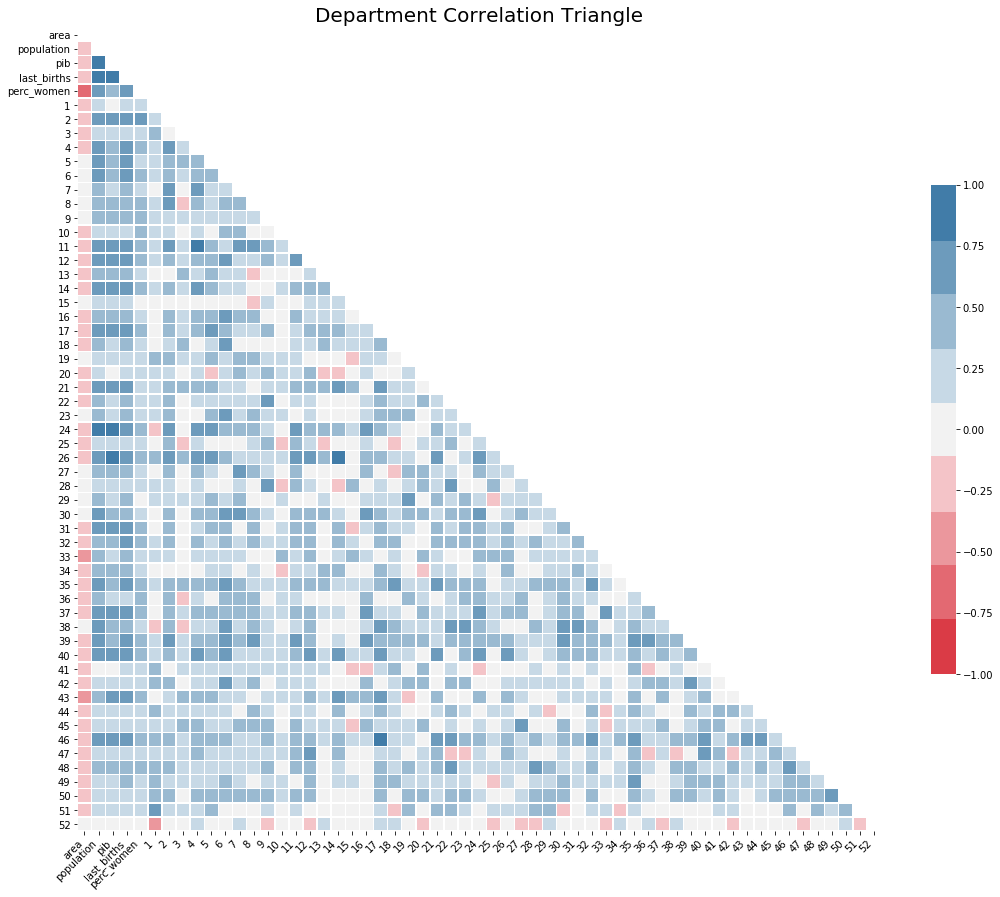

In [11]:
# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype = np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
fig, ax1 = plt.subplots(figsize=(18, 18))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(10, 240, n = 9)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask = mask, cmap = cmap, vmin = -1, vmax = 1, center = 0,
            square = True, linewidths = .5, cbar_kws = {"shrink": .5})

ax1.set_xticklabels(ax1.get_xticklabels(), rotation = 45, horizontalalignment = 'right');

# Add title
ax1.set_title("Department Correlation Triangle", fontsize = 20)
plt.show()

## 3. PCA Process

In [12]:
# Set color list
color_list = ["#1f77b4", "#ff7f0e", "#d62728", "#2ca02c", "#9467bd", "#8c564b", "#e377c2", "#7f7f7f", "#bcbd22", "#17becf"]

In [13]:
# Palette by positions dictionary
zone_palette = dict()
zone_palette["AMAZONIA"] = color_list[0]
zone_palette["ANDINA"] = color_list[1]
zone_palette["CARIBE"] = color_list[2]
zone_palette["ORINOQUIA"] = color_list[3]
zone_palette["PACIFICO"] = color_list[4]
zone_palette["EXTERIOR"] = color_list[5]

In [14]:
# Principal Component Analysis
pca = PCA(n_components = 5)
pca_data = pca.fit_transform(x)

In [15]:
# Function that replace the player position by the zone
def add_zone(data):
    data["Zone"] = data["Department"]
    data["Color"] = data["Department"]
    
    for k, v in dpt_zone.items():
        data["Zone"] = data["Zone"].replace(k, v)
        data["Color"] = data["Color"].replace(k, zone_palette[v])
    
    return data

In [16]:
# Create and show principal components DataFrame
df_pca = pd.DataFrame(data = pca_data, columns = ["PC1", "PC2", "PC3", "PC4", "PC5"])
df_pca = pd.concat([df_pca, dpt_list], axis = 1)
df_pca = df_pca[df_pca["PC1"].notnull()]
df_pca = add_zone(df_pca)
df_pca.head(50)

,PC1,PC2,PC3,PC4,PC5,Department,Zone,Color
0,-6.729798,5.971233,-0.354632,-0.257210,0.823515,AMAZONAS,AMAZONIA,#1f77b4
1,18.689489,4.476766,-5.732305,0.380631,-4.346351,ANTIOQUIA,ANDINA,#ff7f0e
2,-4.637842,-0.891764,1.174014,-0.119604,-0.940790,ARAUCA,ORINOQUIA,#2ca02c
3,5.152335,-4.138105,-3.875924,-4.575280,-1.214119,ATLANTICO,CARIBE,#d62728
4,30.790527,2.032596,6.979268,-1.608931,1.842162,BOGOTA,ANDINA,#ff7f0e
5,2.422054,-1.292357,-1.127692,-4.320648,0.897441,BOLIVAR,CARIBE,#d62728
6,-1.150943,-0.679970,1.096154,-0.078713,-1.474785,BOYACA,ANDINA,#ff7f0e
7,-2.838112,-2.519372,1.878268,0.860113,-1.129920,CALDAS,ANDINA,#ff7f0e
8,-5.135219,4.000796,-0.608492,-0.313137,0.339577,CAQUETA,AMAZONIA,#1f77b4
9,-4.266050,1.012222,1.374987,0.566057,-0.440659,CASANARE,ORINOQUIA,#2ca02c


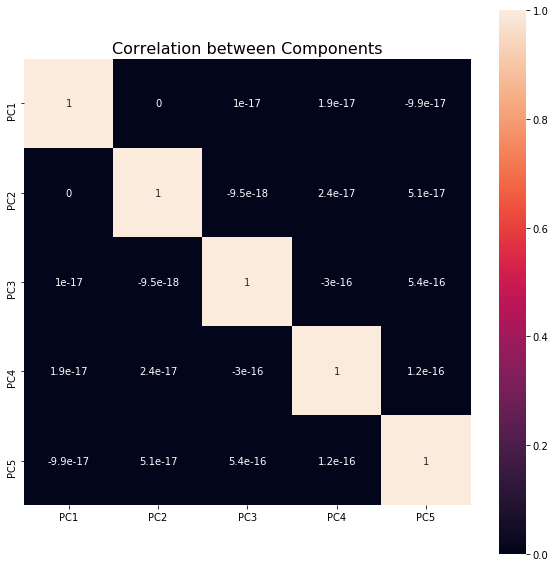

In [17]:
# Show correlation between components
fig, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(df_pca.corr(), square=True, annot=True)
ax.set_title("Correlation between Components", fontsize = 16)
plt.show()

## 4. PCA Variance Ratio

In [18]:
# The explained variance tells us how much information (variance) can be attributed to each of the principal components
list(pca.explained_variance_ratio_)

[0.6356800082057991,
 0.07923495115409912,
 0.05191720078728708,
 0.033904624872095425,
 0.029085906057930024]

In [19]:
# Create horizontal bar chart data
bars = ("PC1", "PC2", "PC3", "PC4", "PC5")
y_pos = np.arange(len(bars))
values = pca.explained_variance_ratio_ * 100
cum = np.cumsum(values)

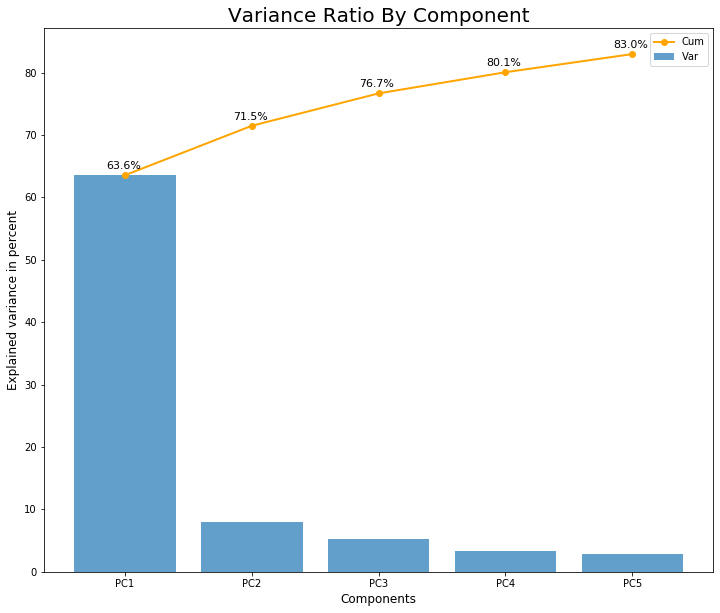

In [20]:
# Set up the matplotlib figure
fig, ax2 = plt.subplots(figsize=(12, 10))

plt.bar(y_pos, values, align = "center", alpha = 0.7)
plt.xticks(y_pos, bars)
plt.plot(y_pos, cum, color = "orange", linewidth = 2, marker="o")
plt.title("Variance Ratio By Component", fontsize = 20)

# Add bar labels
for i, v in enumerate(cum):
    ax2.text(i - .15, v + 1, (str(round(v, 1))+"%"), color = "black", fontweight = "normal", fontsize = 11)

# Plot setup
plt.xlabel("Components", fontsize = 12)
plt.ylabel("Explained variance in percent", fontsize = 12)
plt.legend(("Cum", "Var"), loc = "best")
plt.show()

## 5. PCs Dependencies

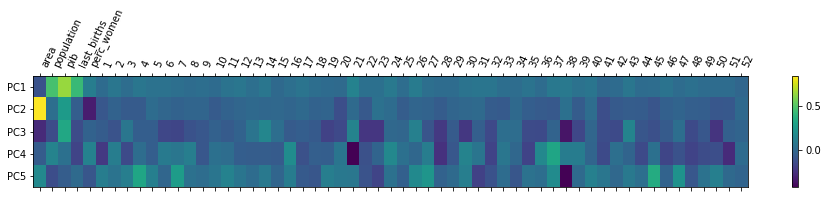

In [21]:
# Create a matshow plot of the Principal Components dependencies
fig = plt.figure(figsize = (16, 2))
plt.matshow(pca.components_, cmap = "viridis", fignum = fig.number, aspect = "auto")
plt.yticks([0, 1, 2, 3, 4], ["PC1", "PC2", "PC3", "PC4", "PC5"], fontsize = 10)
plt.colorbar()
plt.xticks(range(len(data.columns)), data.columns, rotation = 65, ha = "left")
plt.show()

## 6. PCA Plane Visualization

### 6.1. The first 2 components

In [22]:
# Show the total explained variance ratio of model: Only 2 components
n_components = 2
sum(pca.explained_variance_ratio_[0:n_components]) * 100

71.49149593598982

In [23]:
# Eigen-vectors data
n_vectors = 2
lengths = pca.explained_variance_[0:n_vectors]
vectors = pca.components_[0:n_components, 0:n_vectors]
means = pca.mean_[0:n_vectors]

In [24]:
# Function to draw vectors on plane
def draw_vector(v0, v1, ax = None):
    ax = ax or plt.gca()
    arrowprops = dict(arrowstyle = "->", linewidth = 2, shrinkA = 0, shrinkB = 0, color = "#ff7f0e")
    ax.annotate("", v1, v0, arrowprops = arrowprops)

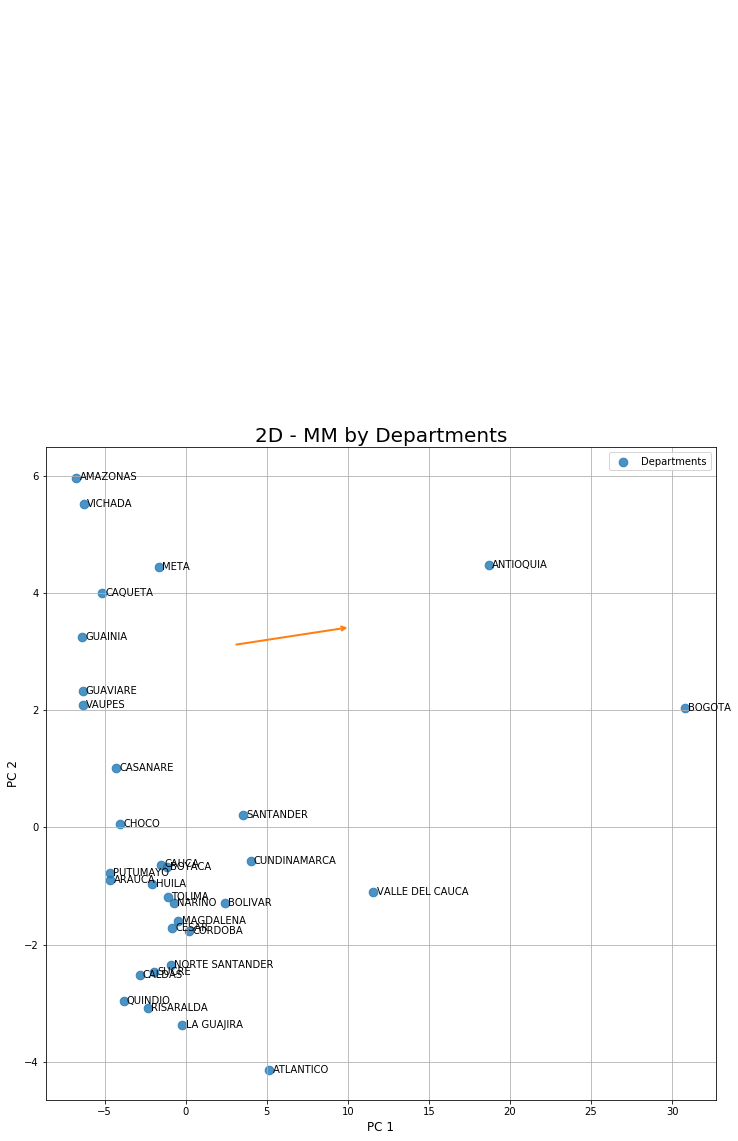

In [25]:
# Create scatter plot with players label
fig, ax3 = plt.subplots(figsize=(12, 12))

# Create 2D scatter plot
plot = sns.regplot(ax=ax3, data=df_pca, x="PC1", y="PC2", fit_reg=False, marker="o", color="#1f77b4", scatter_kws={"s": 75})

# Add annotations one by one with a loop
for ix in range(0, df_pca.shape[0]):
    plot.text(df_pca.PC1[ix] + 0.2, df_pca.PC2[ix] - 0.05, df_pca.Department[ix],
              horizontalalignment = "left", size = "medium", color = "black", weight = "normal")

# Drawing the eigen-vectors
for length, vector in zip(lengths, vectors):
    v = vector * 3 * np.sqrt(length)
    draw_vector(means, means + v)

# Plot setup
ax3.set_xlabel("PC 1", fontsize = 12)
ax3.set_ylabel("PC 2", fontsize = 12)
ax3.set_title("2D - MM by Departments", fontsize = 20)
ax3.legend(["Departments"])
ax3.grid()

### 6.2. The first 3 components

In [26]:
# Show the total explained variance ratio of model: Only 3 components
sum(pca.explained_variance_ratio_[0:3]) * 100

76.68321601471854

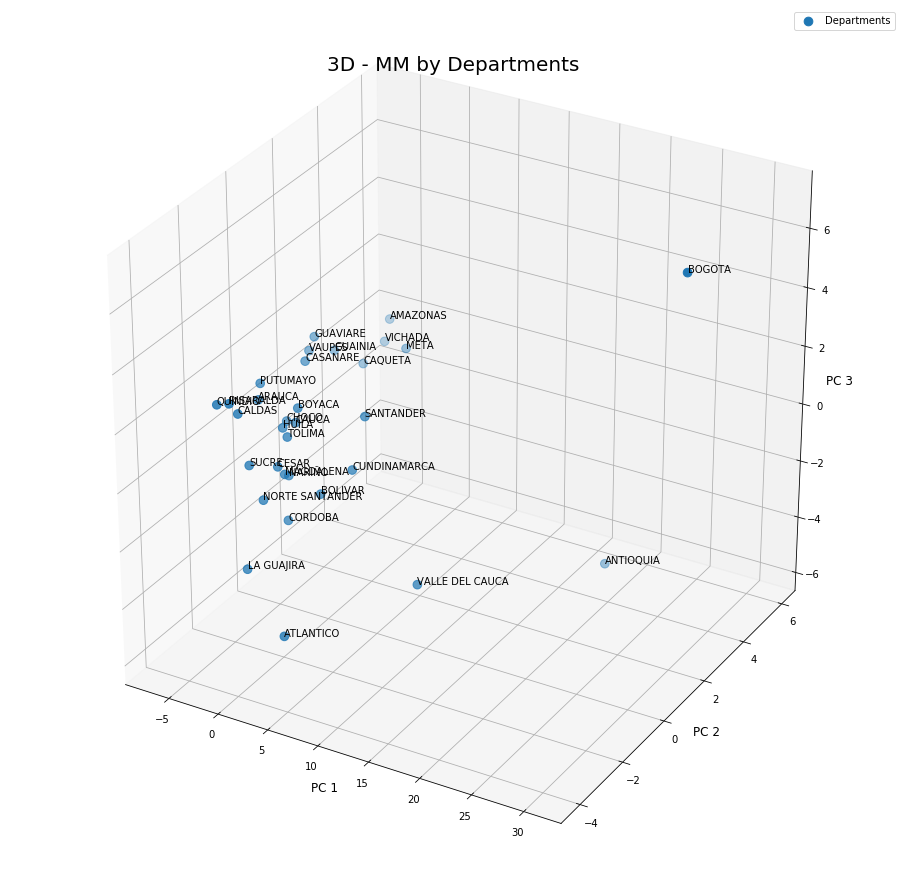

In [27]:
# Create 3D scatter plot
fig = plt.figure(figsize = (16, 16))
ax4 = fig.add_subplot(111, projection = "3d")

# Get (x, y, z) axis values
xx = df_pca.loc[:,["PC1"]].values
yy = df_pca.loc[:,["PC2"]].values
zz = df_pca.loc[:,["PC3"]].values

# Plot values
ax4.scatter(xx, yy, zz, c = "#1f77b4", marker = "o", s = 75)

# Add annotations one by one with a loop
for ix in range(0, len(x)):
    ax4.text(float(xx[ix]), float(yy[ix]), float(zz[ix]), df_pca.Department[ix], 
             horizontalalignment = "left", size = "medium", color = "black", weight = "normal")

# Plot setup
ax4.set_xlabel("PC 1", fontsize = 12)
ax4.set_ylabel("PC 2", fontsize = 12)
ax4.set_zlabel("PC 3", fontsize = 12)
ax4.set_title("3D - MM by Departments", fontsize = 20)
ax4.legend(["Departments"])
ax4.grid()

## 7. Clustering: K-Means

### 7.1. Calculating the Jambu elbow

In [28]:
# Creating training dataset
if n_pc == 2:
    n_cluster = 5
    x = df_pca['PC1'].values
    y = df_pca['PC2'].values
    ds_train = np.array(list(zip(x, y)))
elif n_pc == 3:
    n_cluster = 6
    x = df_pca['PC1'].values
    y = df_pca['PC2'].values
    z = df_pca['PC2'].values
    ds_train = np.array(list(zip(x, y, z)))
else:
    n_cluster = 7
    x = df_pca['PC1'].values
    y = df_pca['PC2'].values
    z = df_pca['PC3'].values
    a = df_pca['PC4'].values
    b = df_pca['PC5'].values
    ds_train = np.array(list(zip(x, y, z, a, b)))
print('Nro. PCs: %s and Nro. Clusters: %s' % (n_pc, n_cluster))

Nro. PCs: 3 and Nro. Clusters: 6


In [29]:
# Calculating the Jambu Elbow scores
Nc = range(1, 20)
if not gaussian:
    models = [KMeans(n_clusters = i) for i in Nc]
    score = [models[i].fit(ds_train).inertia_ for i in range(len(models))]
else:
    models = [GaussianMixture(n_components=i) for i in Nc]
    score = [models[i].fit(ds_train).lower_bound_ for i in range(len(models))]

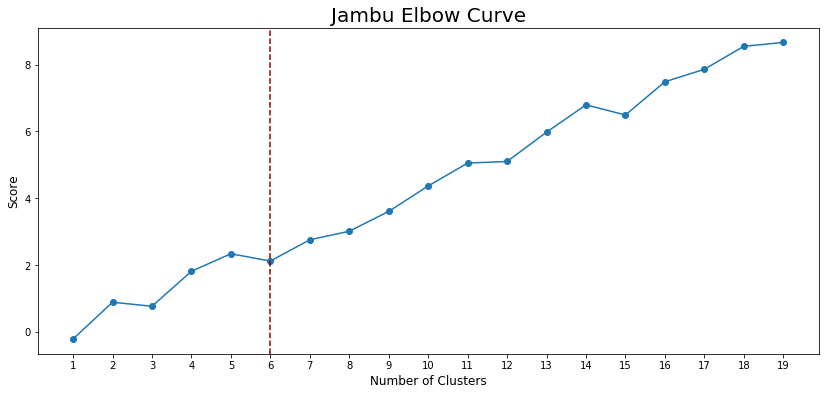

In [30]:
# Plot the results
fig, ax0 = plt.subplots(figsize=(14, 6))
plt.plot(Nc, score, marker='o')
plt.axvline(x=n_cluster, color="#8b0000", linestyle="--")
plt.xticks(np.arange(1, 20, 1))
plt.xlabel("Number of Clusters", fontsize = 12)
plt.ylabel("Score", fontsize = 12)
plt.title("Jambu Elbow Curve", fontsize = 20)
plt.show()

### 7.2. Clustering the data

In [31]:
# Calculates the K-Means for (x, y) dataset
def run_kmeans(k_clusters, labels):
    
    if not gaussian:
        model = KMeans(n_clusters=k_clusters, algorithm="elkan", random_state=0)
    else:
        model = GaussianMixture(n_components=k_clusters, max_iter=200, covariance_type='full')
    model = model.fit(ds_train)
    
    # Getting the cluster labels
    clusters = model.predict(ds_train)
    
    # Centroid values
    if not gaussian:
        centroids = model.cluster_centers_
    else:
        centroids = model.means_
    
    # Plotting K-Means result
    plot_kmeans_data(ds_train, k_clusters, centroids, clusters, labels)
    
    return clusters, centroids

In [32]:
# Create scatter plot with K-Means data
def plot_kmeans_data(data, k_clusters, centroids, clusters, labels):
    fig, ax = plt.subplots(figsize=(14, 14))
    
    # Plotting vars
    legend_list = []
    n_data = len(data)
    
    # Plot centroids
    plt.scatter(centroids[:, 0], centroids[:, 1], s=25, color="gray", marker="D")
    for i in range(k_clusters):
        legend_list.append(mpatches.Patch(color=color_list[i], label='Cluster ' + str(i + 1)))
        if labels:
            ax.text(centroids[i][0] + 0.1, centroids[i][1] - 0.1, str(i + 1), fontsize=20)
    
    # Plot data
    for i in range(k_clusters):
        points = np.array([data[j] for j in range(n_data) if clusters[j] == i])
        sns.scatterplot(ax=ax, x=points[:, 0], y=points[:, 1], s=100, color=color_list[i])
    
    # Add annotations one by one with a loop
    if labels:
        for ix in range(0, df_pca.shape[0]):
            ax.text(df_pca.PC1[ix] + 0.2, df_pca.PC2[ix] - 0.1, df_pca.Department[ix],
                    horizontalalignment = "left", size = "medium", color = "black", weight = "normal")
    
    # Plot setup
    ax.set_xlabel("PC 1", fontsize = 12)
    ax.set_ylabel("PC 2", fontsize = 12)
    if gaussian:
        ax.set_title("MM Gaussian Mixture Clustering", fontsize = 20)
    else:
        ax.set_title("MM Kmeans Clustering", fontsize = 20)
    ax.grid()
    plt.legend(handles=legend_list)
    plt.show()

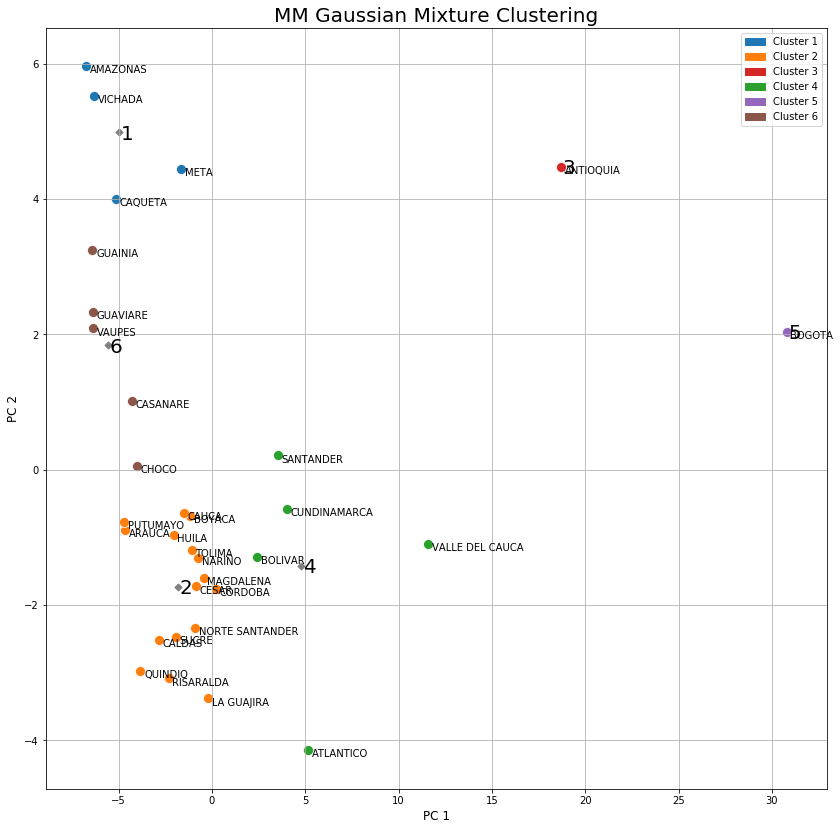

In [33]:
# Create interactive control to control k value
clusters, centroids = run_kmeans(k_clusters=n_cluster, labels=True)

### 7.3. Show natural grouping by Regions

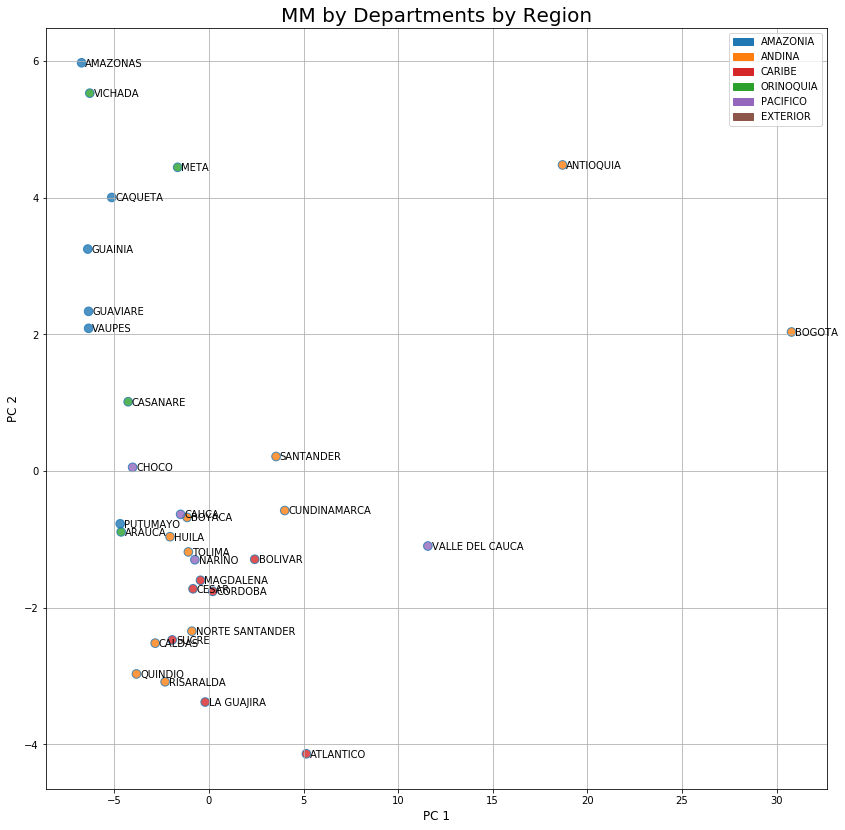

In [34]:
# Create scatter plot with players label
fig, ax5 = plt.subplots(figsize=(14, 14))

# Plotting vars
legend_list = []
for k, v in zone_palette.items():
    legend_list.append(mpatches.Patch(color=v, label=k))

# Create 2D scatter plot
plot = sns.regplot(ax=ax5, data=df_pca, x="PC1", y="PC2", fit_reg=False,
                   marker="o", scatter_kws={"s":75, "facecolors":df_pca["Color"]})

# Add annotations one by one with a loop
for ix in range(0, df_pca.shape[0]):
    plot.text(df_pca.PC1[ix] + 0.2, df_pca.PC2[ix] - 0.05, df_pca.Department[ix],
              horizontalalignment = "left", size = "medium", color = "black", weight = "normal")

# Plot setup
ax5.set_xlabel("PC 1", fontsize = 12)
ax5.set_ylabel("PC 2", fontsize = 12)
ax5.set_title("MM by Departments by Region", fontsize=20)
ax5.grid()
plt.legend(handles=legend_list)
plt.show()

## 8. Clusters Description

In [35]:
# CLustering results dataframe
df_result = pd.DataFrame(columns=["n_item", "std_dev", "n_item_2", "w_std_dev"])

### 8.1. Cluster sizes

In [36]:
cluster_count = Counter()
for ix in clusters:
    c_name = str(ix + 1)
    cluster_count[c_name] += 1

# Cooking dataframe
df = pd.DataFrame.from_records(cluster_count.most_common(), columns = ['cluster', 'frequency']).sort_values(by=['cluster'])

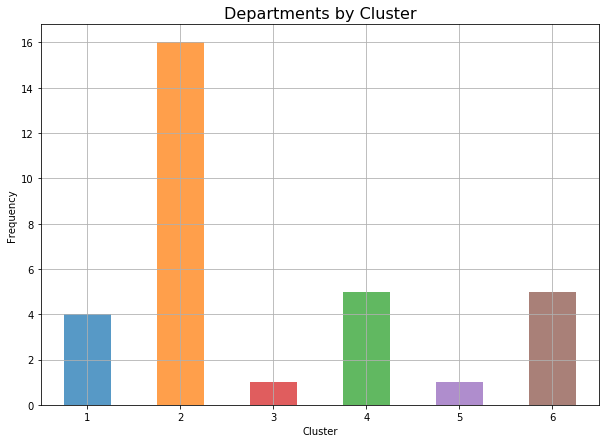

In [37]:
fig, ax = plt.subplots()
df.plot.bar(ax=ax, x='cluster', y='frequency', alpha=0.75, figsize=(10, 7), color=color_list)
plt.title('Departments by Cluster', fontsize=16)
plt.xlabel('Cluster')
plt.ylabel('Frequency')
ax.get_legend().remove()
ax.grid()
plt.xticks(rotation=0)
plt.show()

### 7.2. Regions by cluster

In [38]:
cluster_data = Counter()
for ix, row in df_pca.iterrows():
    cluster = str(clusters[ix] + 1)
    zone = row['Zone']
    
    if not cluster in cluster_data:
        cluster_data[cluster] = Counter()
    cluster_data[cluster][zone] += 1

sorted(cluster_data.items())

[('1', Counter({'AMAZONIA': 2, 'ORINOQUIA': 2})),
 ('2',
  Counter({'ORINOQUIA': 1,
           'ANDINA': 7,
           'PACIFICO': 2,
           'CARIBE': 5,
           'AMAZONIA': 1})),
 ('3', Counter({'ANDINA': 1})),
 ('4', Counter({'CARIBE': 2, 'ANDINA': 2, 'PACIFICO': 1})),
 ('5', Counter({'ANDINA': 1})),
 ('6', Counter({'ORINOQUIA': 1, 'PACIFICO': 1, 'AMAZONIA': 3}))]

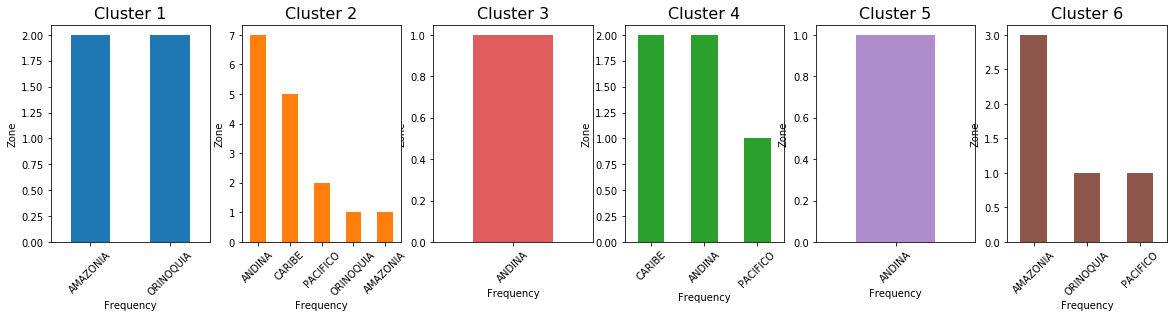

In [39]:
warnings.filterwarnings("ignore",category=matplotlib.cbook.mplDeprecation)
fig = plt.figure(figsize = (20, 4))
fig.subplots_adjust(hspace = 0.2, wspace = 0.2)

for ix in clusters:
    ax = plt.subplot(1, n_cluster, ix + 1)
    c_name = str(ix + 1)
    data = cluster_data[str(c_name)].most_common()
    df = pd.DataFrame.from_records(data, columns = ['zone', 'frequency']).sort_values(by='frequency', ascending=False)
    df.plot.bar(ax=ax, x='zone', y='frequency', color=color_list[ix], alpha=0.75)
    ax.get_legend().remove()
    plt.title('Cluster ' + c_name, fontsize=16)
    plt.xlabel('Frequency')
    plt.ylabel('Zone')
    plt.xticks(rotation=45)

plt.show()

### 7.3. Departments by cluster

In [40]:
dpt_cluster = {}
for i in range(n_cluster):
    cluster_name = (i+1)
    dpt_list = []
    print('>> Cluster %s:' % cluster_name)
    
    for j in range(len(clusters)):
        if i == clusters[j]:
            dpt_list.append(df_pca.iloc[j]['Department'])
    
    dpt_cluster[cluster_name] = dpt_list
    print('  ', dpt_list)

>> Cluster 1:
   ['AMAZONAS', 'CAQUETA', 'META', 'VICHADA']
>> Cluster 2:
   ['ARAUCA', 'BOYACA', 'CALDAS', 'CAUCA', 'CESAR', 'CORDOBA', 'HUILA', 'LA GUAJIRA', 'MAGDALENA', 'NARIÑO', 'NORTE SANTANDER', 'PUTUMAYO', 'QUINDIO', 'RISARALDA', 'SUCRE', 'TOLIMA']
>> Cluster 3:
   ['ANTIOQUIA']
>> Cluster 4:
   ['ATLANTICO', 'BOLIVAR', 'CUNDINAMARCA', 'SANTANDER', 'VALLE DEL CAUCA']
>> Cluster 5:
   ['BOGOTA']
>> Cluster 6:
   ['CASANARE', 'CHOCO', 'GUAINIA', 'GUAVIARE', 'VAUPES']


### 7.4. Show data by Departments by Cluster

In [41]:
# Read raw data
data_url = "../data/mm_weekly_dpt_data.csv"
dptdata = pd.read_csv(data_url, parse_dates=["date"])
dptdata

,department,date,value
0,ANTIOQUIA,2017-12-31,0
1,ARAUCA,2017-12-31,0
2,ATLANTICO,2017-12-31,1
3,BOGOTA,2017-12-31,1
4,BOLIVAR,2017-12-31,1
...,...,...,...
3379,MAGDALENA,2020-02-16,0
3380,META,2020-02-16,1
3381,NARIÑO,2020-02-16,1
3382,NORTE SANTANDER,2020-02-16,1


In [42]:
dpt_ts = {}
for cluster, departments in dpt_cluster.items():
    for dpt in departments:
        df = dptdata[dptdata['department'] == dpt]
        ts = df.set_index('date')['value'].asfreq(freq='W')
        dpt_ts[dpt] = ts

In [43]:
# Average a list of time series
def avg_time_series(ts_data, ts_list, allow_dbl, c_name):
    avg_ts = None
    df = None
    n = len(ts_list)
    
    for dpt in ts_list:
        ts = ts_data[dpt]
        
        if avg_ts is None:
            avg_ts = ts
            df = pd.DataFrame(ts)
        else:
            avg_ts = avg_ts.add(ts, fill_value=0)
            df = pd.concat([df, pd.DataFrame(ts)], axis=1, sort=False)
    avg_ts = avg_ts / n
    
    if not allow_dbl:
        avg_ts = math.ceil(avg_ts)
    
    std_dev = 0
    max_value = 0
    if len(df.columns) > 1:
        for ix, row in df.iterrows():
            values = np.nan_to_num(row.values)
            max_value = max(np.max(values), max_value)
            std_dev += np.std(values)
        std_dev = 100.0 * std_dev / len(df) / max_value
    
    print('n time series:', n, ', std dev:', std_dev, 'max value:', max_value)
    df_result.loc[c_name - 1] = [n, std_dev, n * n, n * std_dev]
    
    return avg_ts

In [44]:
# Plot trends by year
def plot_cluster_curves(data, dpt_list, c_name, allow_dbl=True):
    plt.figure(figsize=(18, 5), dpi=200)
    
    # Plot all curves
    for dpt in dpt_list:
        ts = data[dpt]
        plt.plot(ts, label=dpt, alpha=0.25)
    
    # Plot average curve
    avg_ts = avg_time_series(data, dpt_list, allow_dbl, c_name)
    plt.plot(avg_ts, label='average', alpha=1, color='black')
        
    plt.title('Cluster %s MM trends' % c_name, fontsize=16)
    plt.xlabel('Date', fontsize=10)
    plt.ylabel('Num. Deaths', fontsize=10)
    plt.xticks(fontsize=10)
    plt.legend()
    plt.show()

n time series: 4 , std dev: 6.659215466239017 max value: 2.0


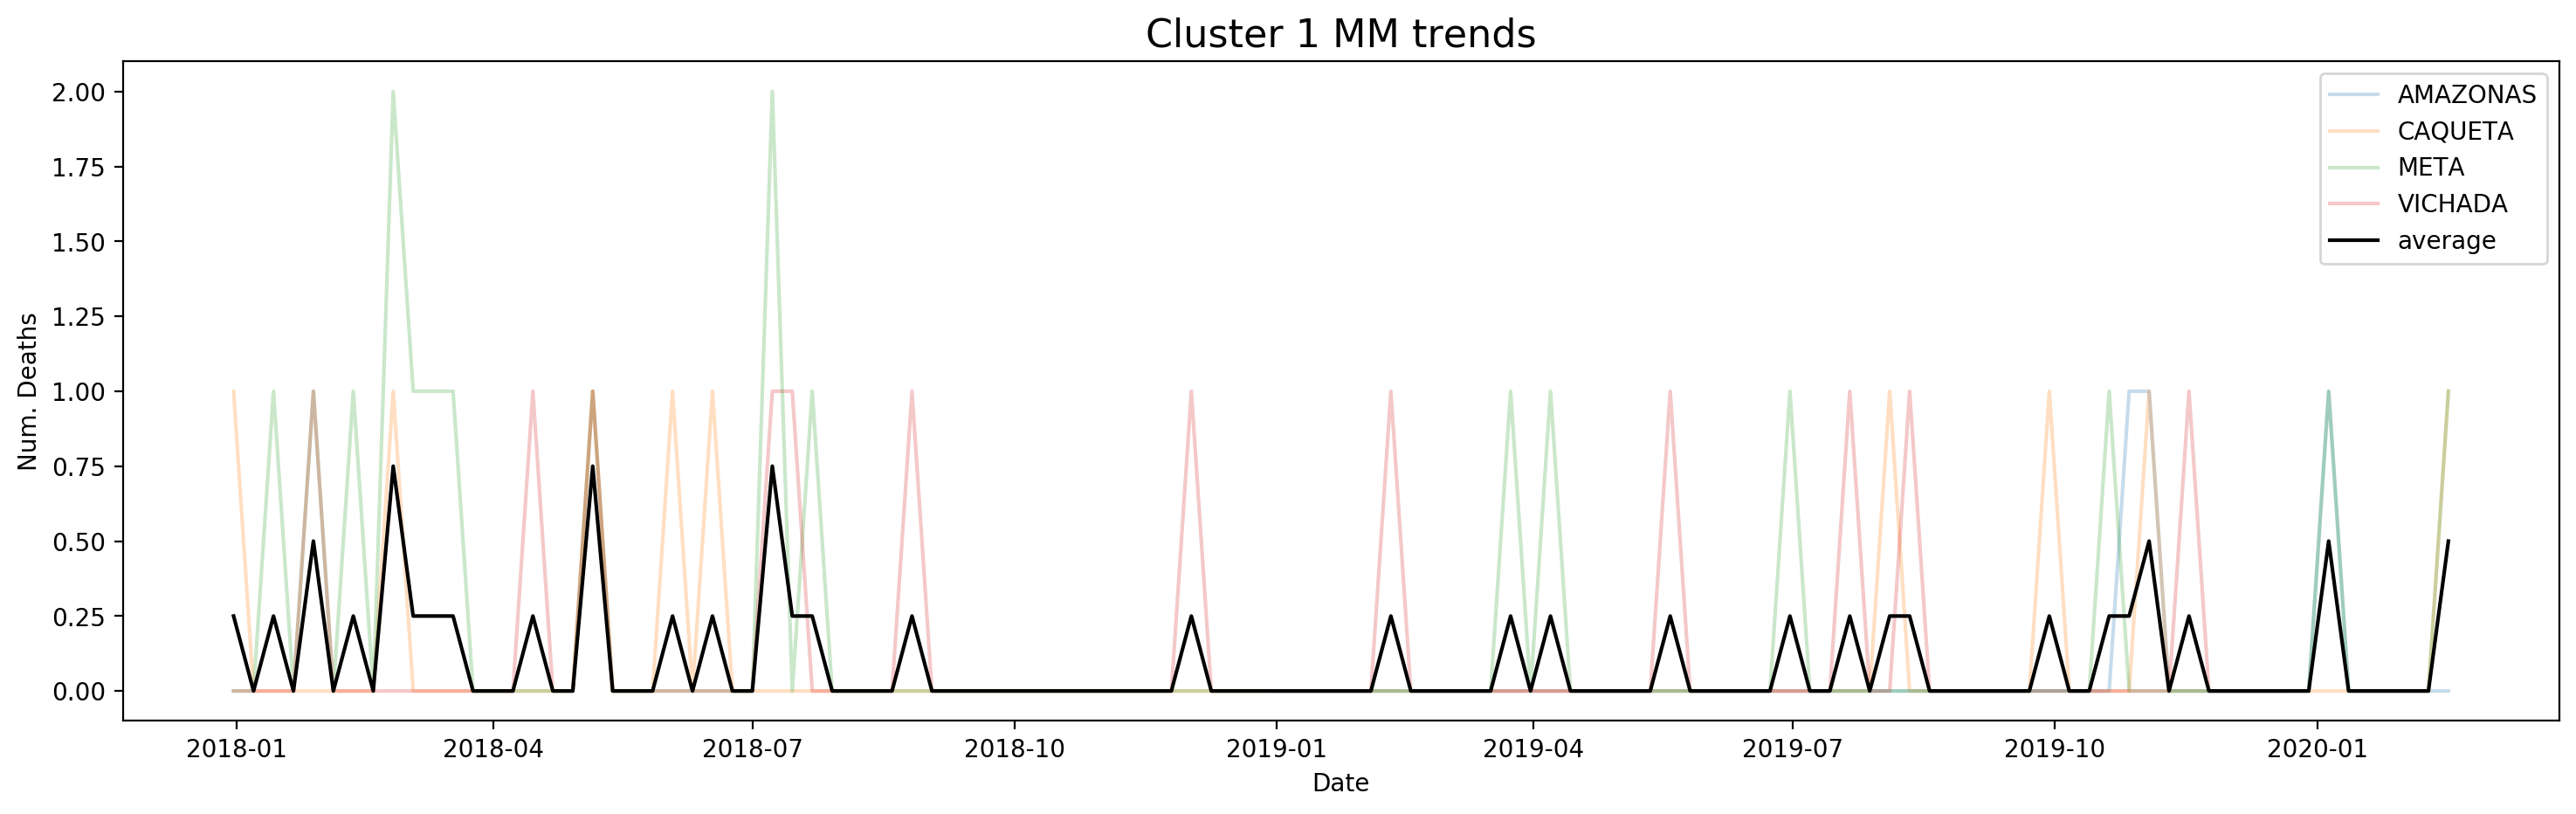

In [45]:
# Plot cluster 1
c_name = 1
plot_cluster_curves(dpt_ts, dpt_cluster[c_name], c_name)

n time series: 16 , std dev: 14.120589102808374 max value: 3.0


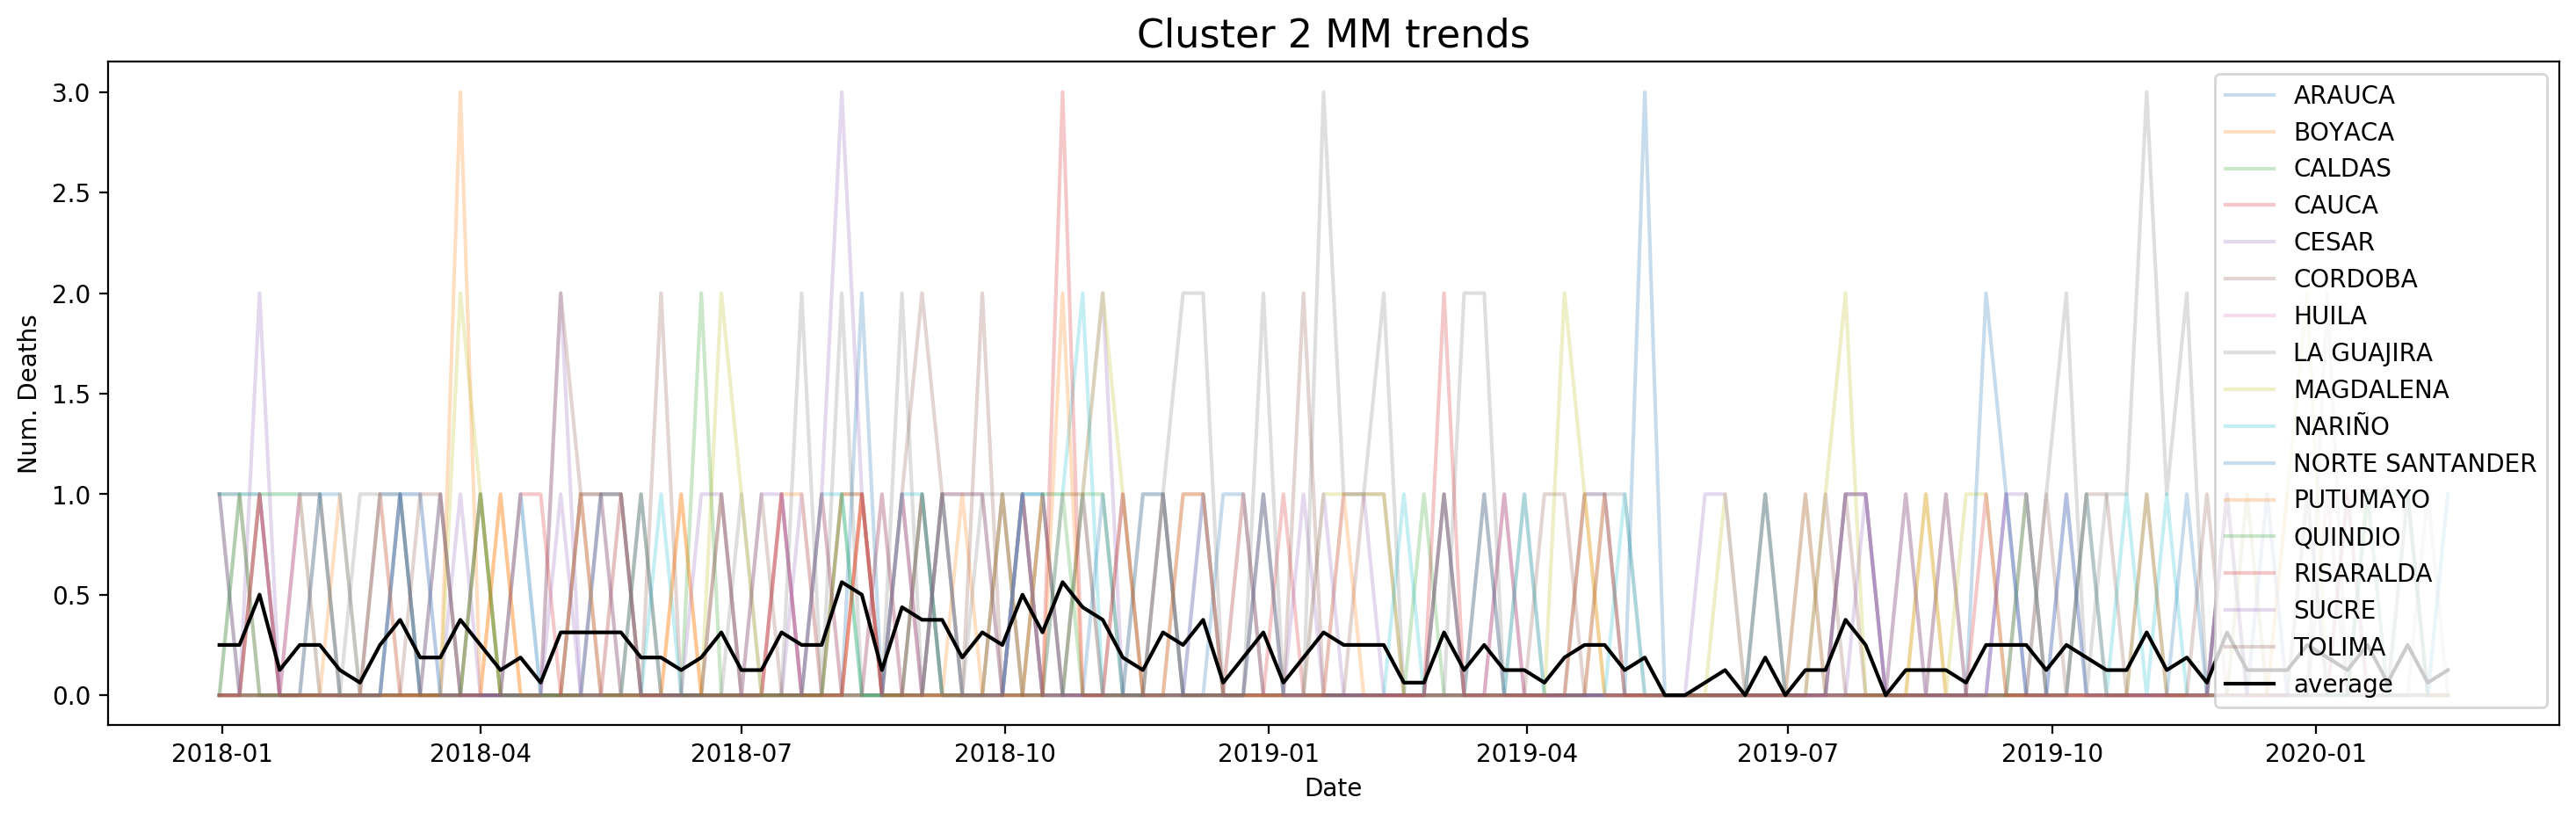

In [46]:
# Plot cluster 2
c_name = 2
plot_cluster_curves(dpt_ts, dpt_cluster[c_name], c_name)

n time series: 1 , std dev: 0 max value: 0


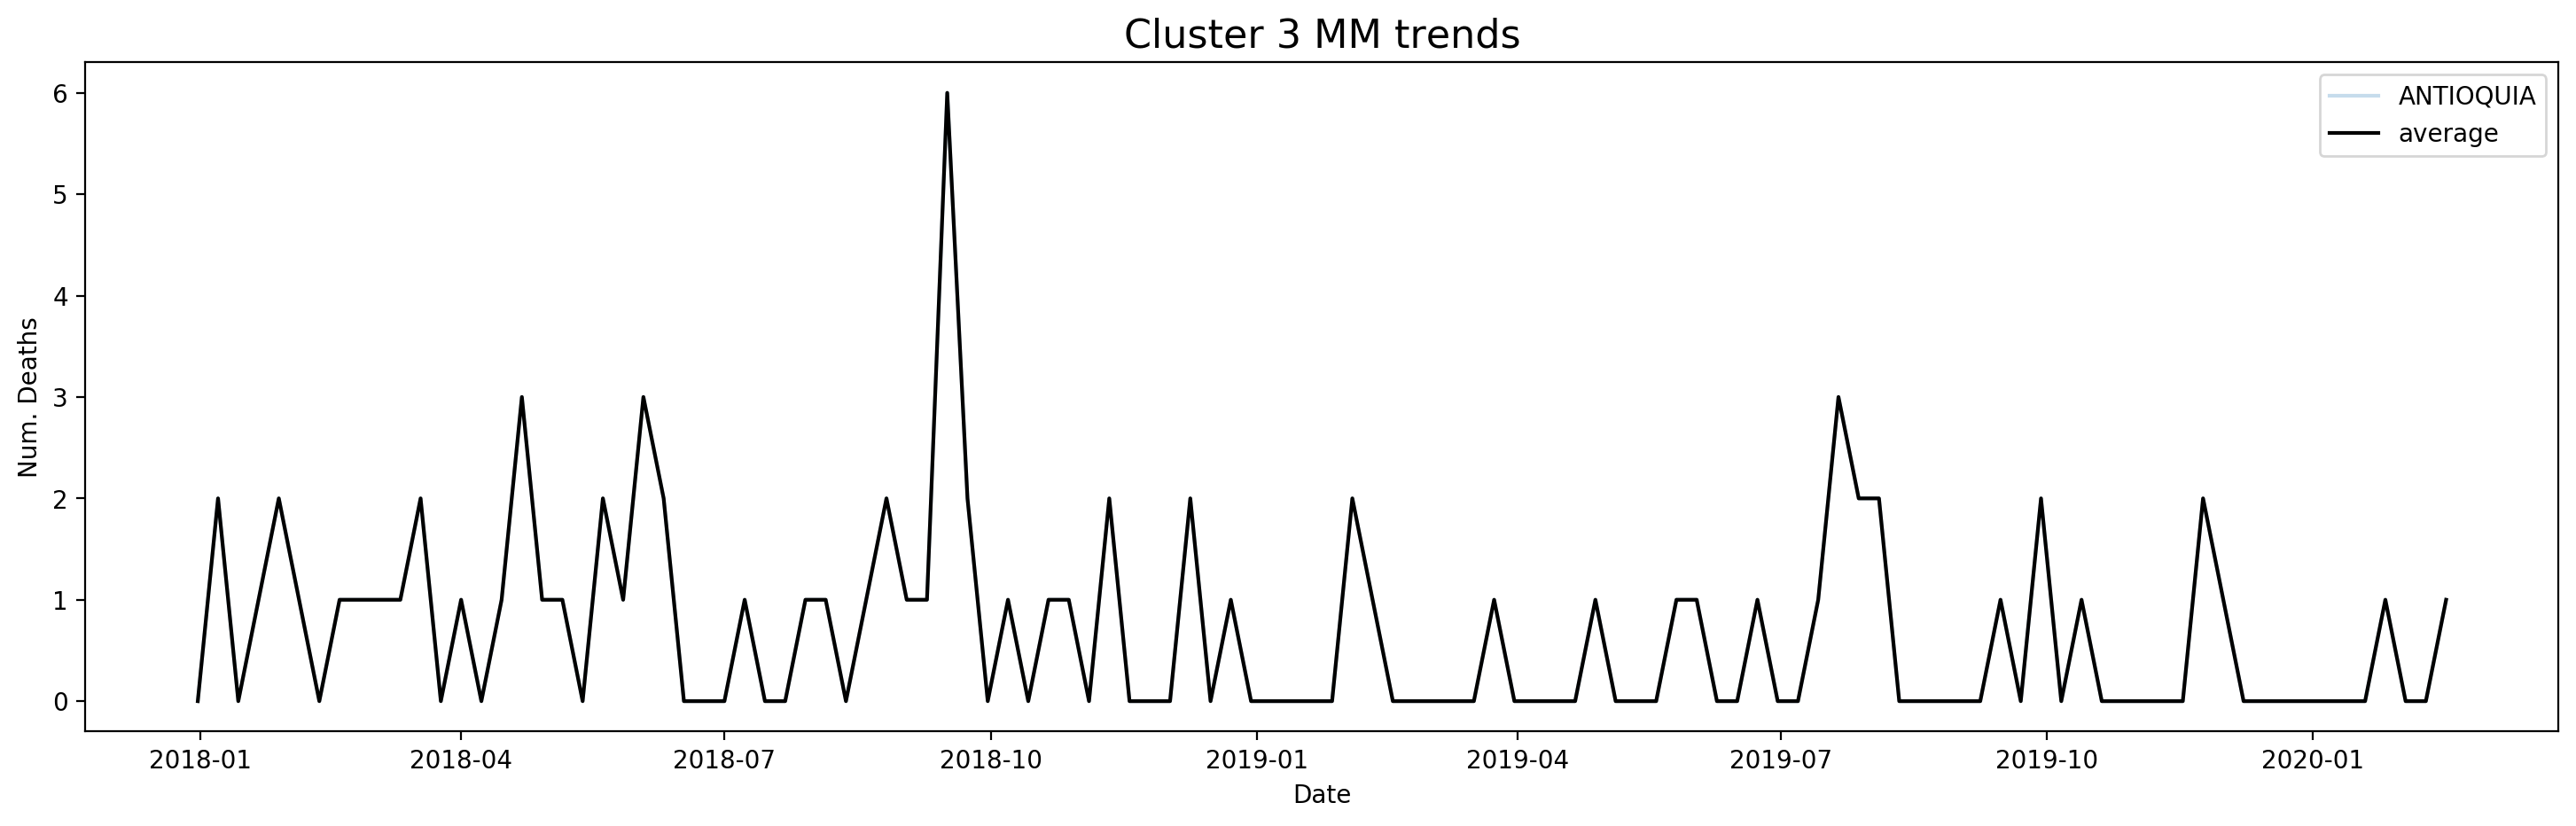

In [47]:
# Plot cluster 3
c_name = 3
plot_cluster_curves(dpt_ts, dpt_cluster[c_name], c_name)

n time series: 5 , std dev: 12.483642654155316 max value: 4.0


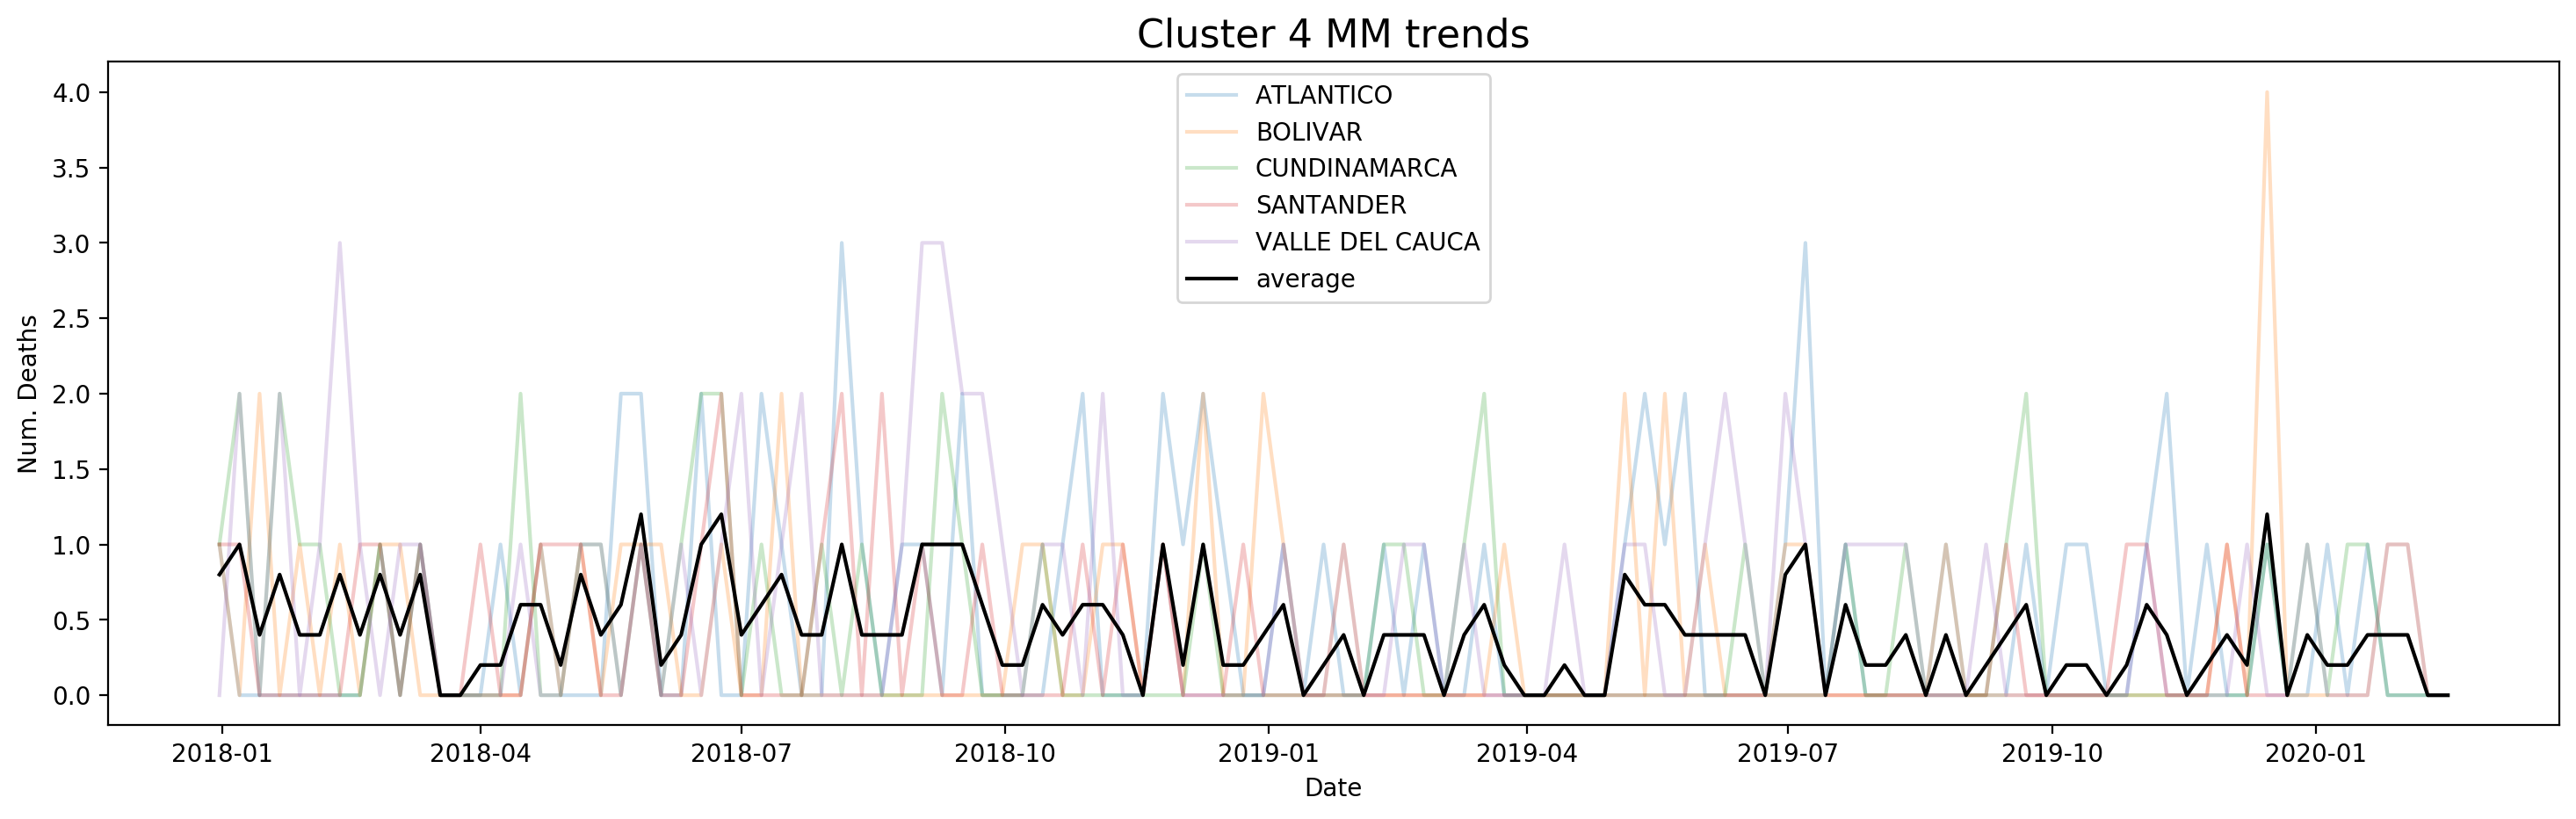

In [48]:
# Plot cluster 4
c_name = 4
plot_cluster_curves(dpt_ts, dpt_cluster[c_name], c_name)

n time series: 1 , std dev: 0 max value: 0


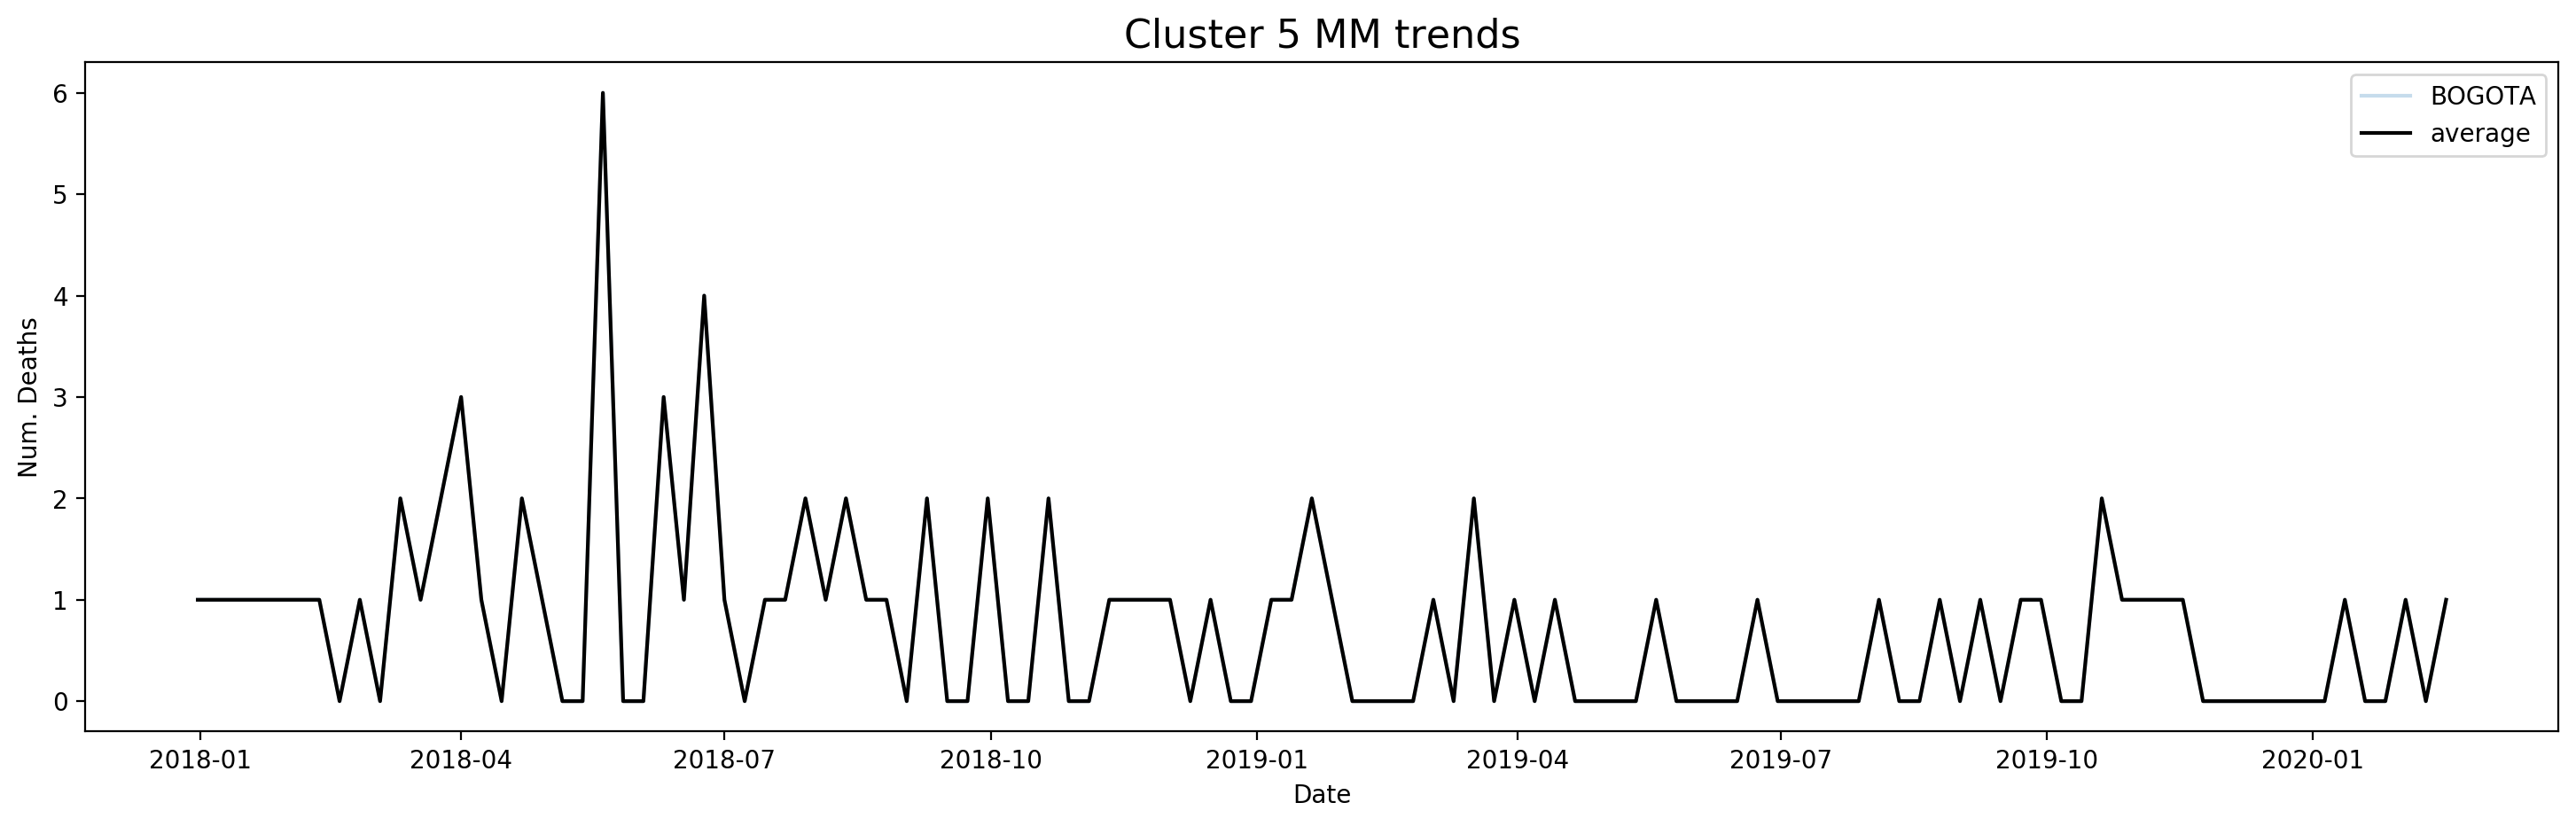

In [49]:
# Plot cluster 5
c_name = 5
plot_cluster_curves(dpt_ts, dpt_cluster[c_name], c_name)

n time series: 5 , std dev: 4.18139575678071 max value: 3.0


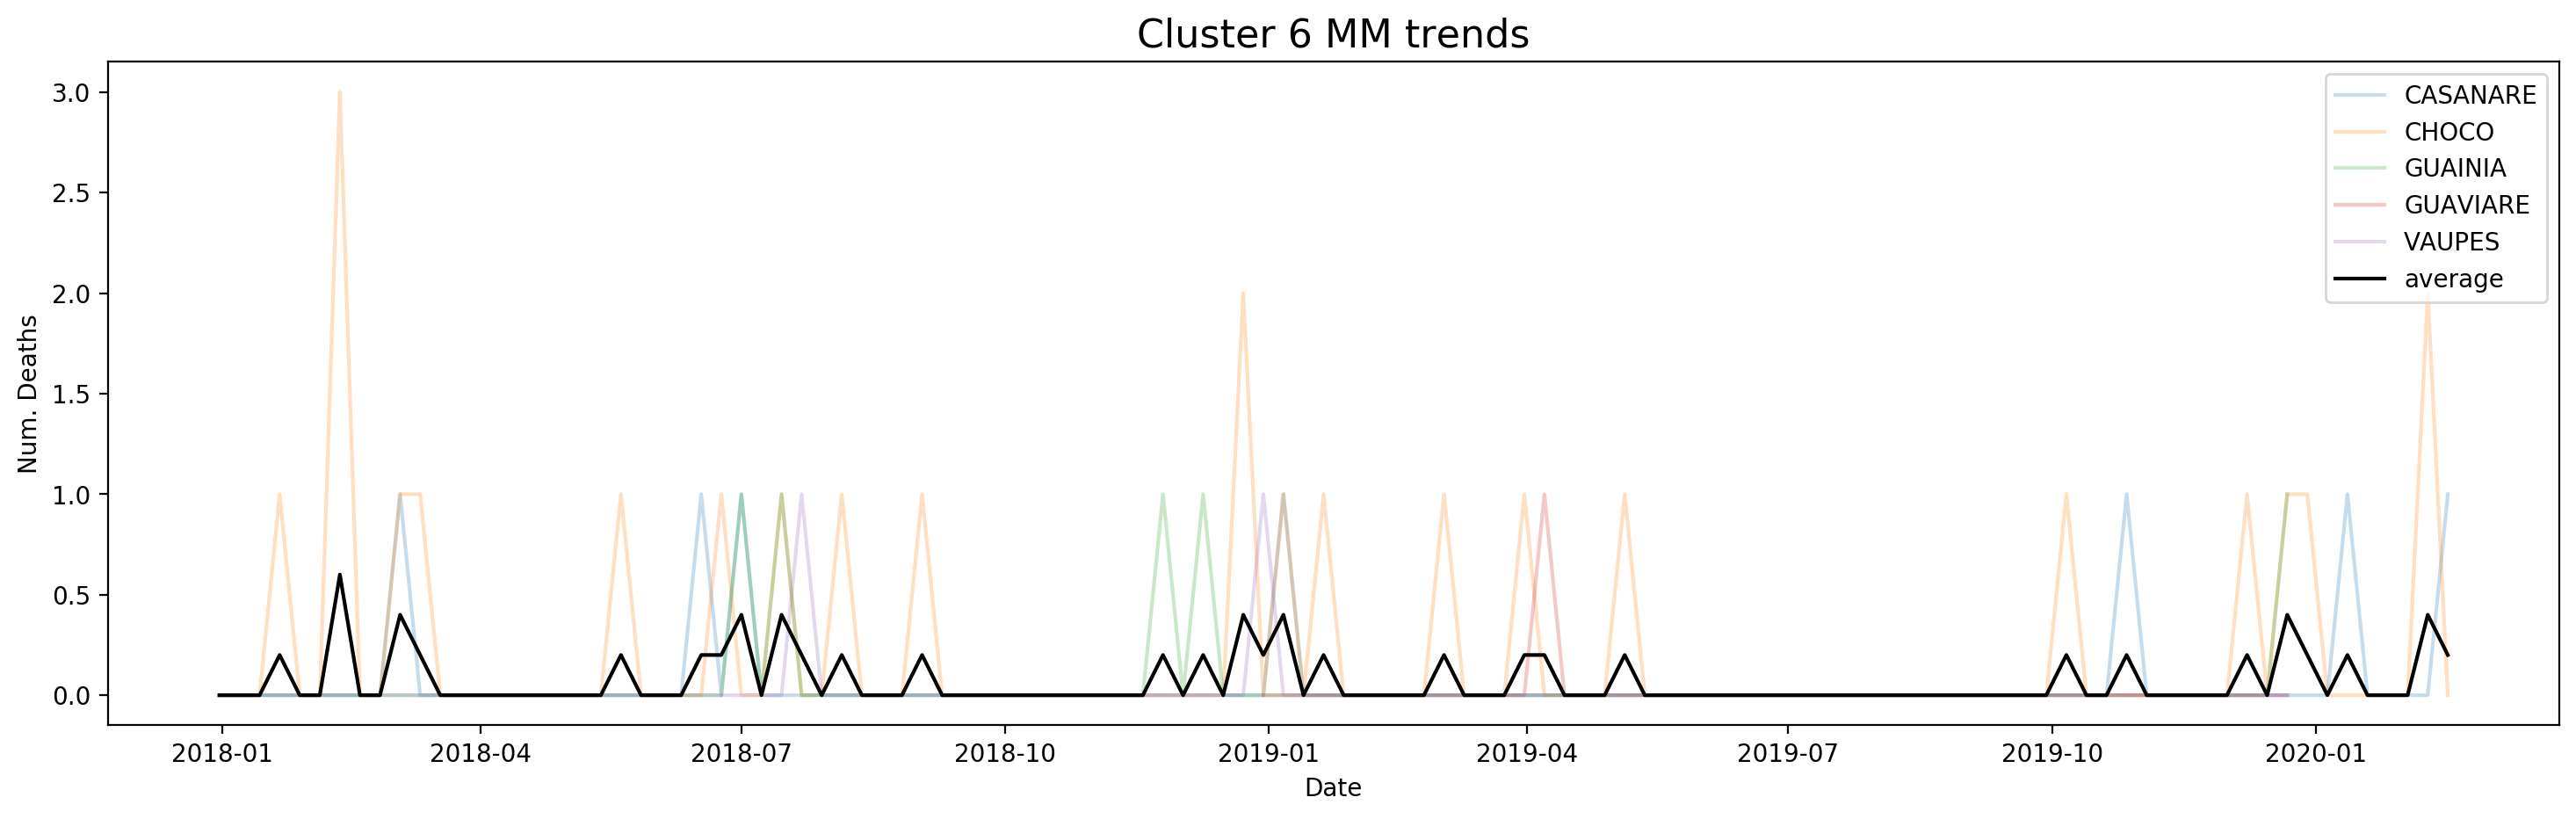

In [50]:
# Plot cluster 6
if n_cluster > 5:
    c_name = 6
    plot_cluster_curves(dpt_ts, dpt_cluster[c_name], c_name)

In [51]:
# Plot cluster 7
if n_cluster > 6:
    c_name = 7
    plot_cluster_curves(dpt_ts, dpt_cluster[c_name], c_name)

### 7.5. Show results

In [52]:
df_result

,n_item,std_dev,n_item_2,w_std_dev
0,4.0,6.659215,16.0,26.636862
1,16.0,14.120589,256.0,225.929426
2,1.0,0.000000,1.0,0.000000
3,5.0,12.483643,25.0,62.418213
4,1.0,0.000000,1.0,0.000000
5,5.0,4.181396,25.0,20.906979


In [53]:
cluster_avg_item = math.sqrt(np.mean(df_result['n_item_2'].values))
avg_wn_std_dev = np.sum(df_result['w_std_dev'].values) / np.sum(df_result['n_item'].values)
print('Avg Items by Cluster: %0.4f' % cluster_avg_item)
print('Avg WN Std Dev: %0.4f' % avg_wn_std_dev)

Avg Items by Cluster: 7.3485
Avg WN Std Dev: 10.4966


---
End of analysis